# TASK - 03

# PRODIGY INFOTECH

##  Predicting Customer Purchases: A Decision Tree Approach

### Introduction:

In the ever-evolving landscape of marketing and sales, understanding customer behavior is paramount. By leveraging demographic and behavioral data, businesses can predict whether a customer will purchase a product or service. In this project, we aim to build a decision tree classifier to analyze customer data and forecast their purchasing decisions. Through exploratory data analysis (EDA) and model building, we seek to uncover insights that can inform targeted marketing strategies, optimize resource allocation, and ultimately enhance customer engagement and satisfaction.

### Objectives:

1. Perform comprehensive exploratory data analysis (EDA) to understand the structure of the dataset, identify patterns, and explore relationships between features and the target variable.
2. Preprocess the data, including handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.
3. Build and train a decision tree classifier using the training data to predict customer purchases based on demographic and behavioral attributes.
4. Evaluate the performance of the decision tree classifier on the testing data using relevant metrics such as accuracy, precision, recall, and F1-score.
5. Provide insights and recommendations based on the analysis to assist businesses in devising effective marketing strategies and improving customer acquisition and retention efforts.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
data = pd.read_csv("C:/Users/Data Analyst/OneDrive/Desktop/bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [9]:
# Display the first few rows of the dataset
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  cellular   19   oct        79         1     -1         0  unknown      no  
1  cellular   11   may       220         1    339         4  failure      no  
2  cellular   16   apr       185         1    330         1  failure      no  
3   unknown    3   jun       199         4     -1         0  unknown      no  
4   unknown    5   may       226         1     -1         0  unknown      no  


In [10]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


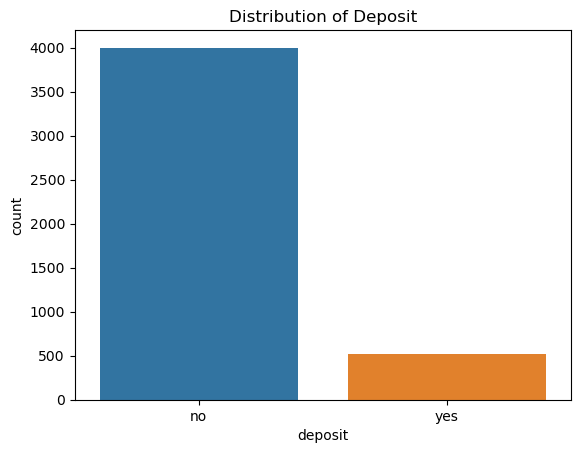

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame and 'deposit' is a column in that DataFrame
sns.countplot(x='deposit', data=data)
plt.title('Distribution of Deposit')
plt.show()


C:\Users\Data Analyst\AppData\Local\Temp\ipykernel_9228\4028694953.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


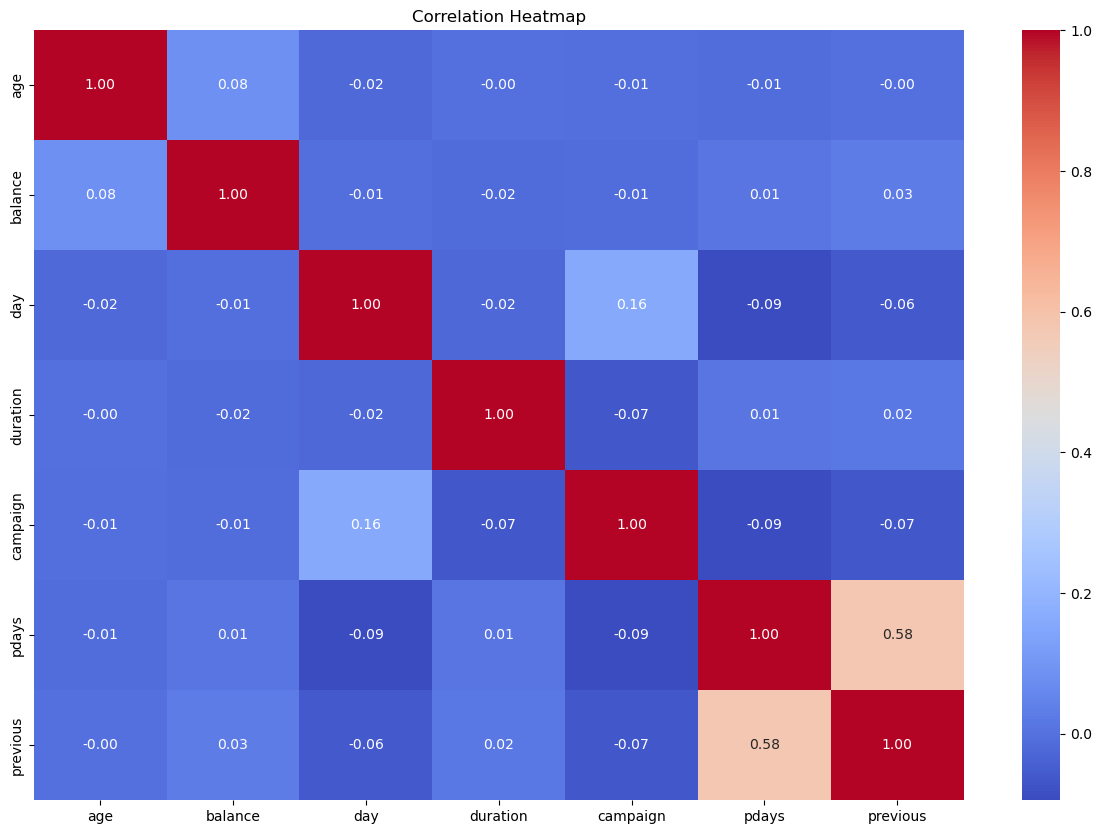

In [14]:
# Visualize relationships between features and the target variable
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

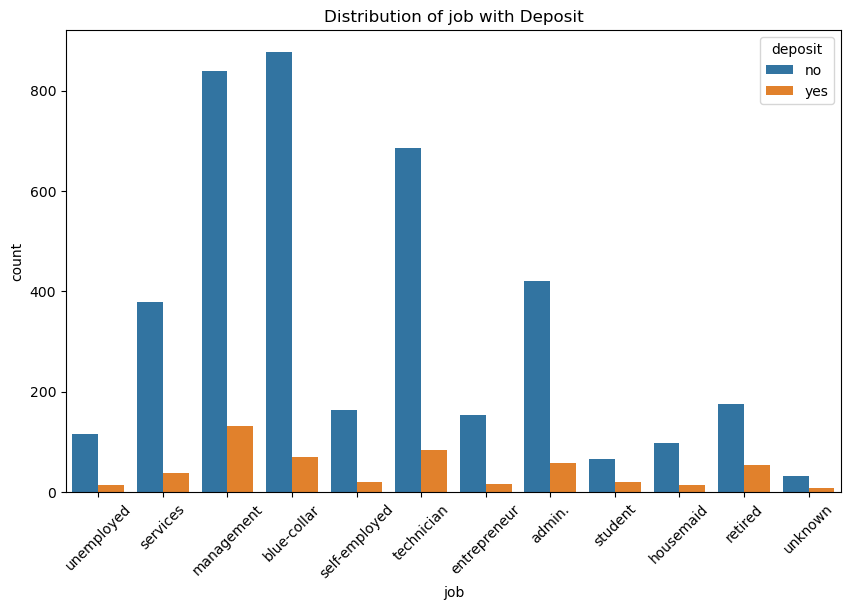

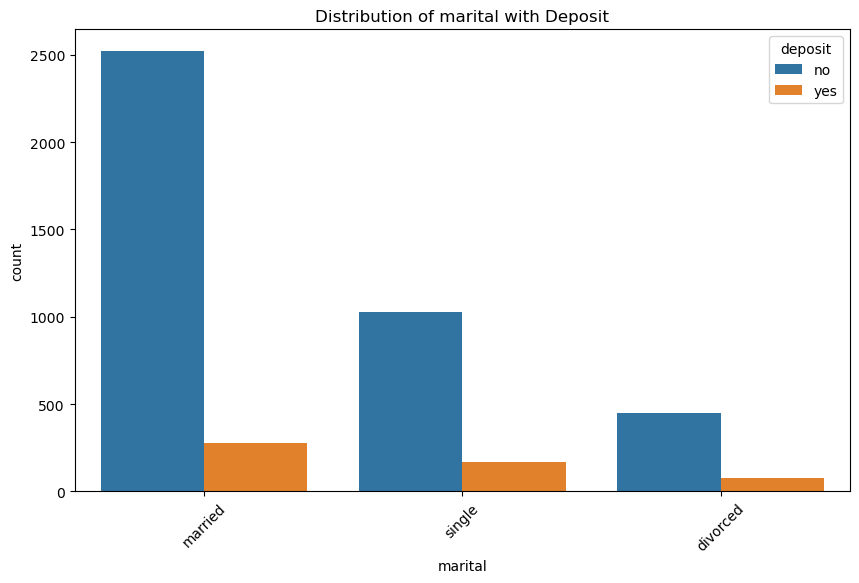

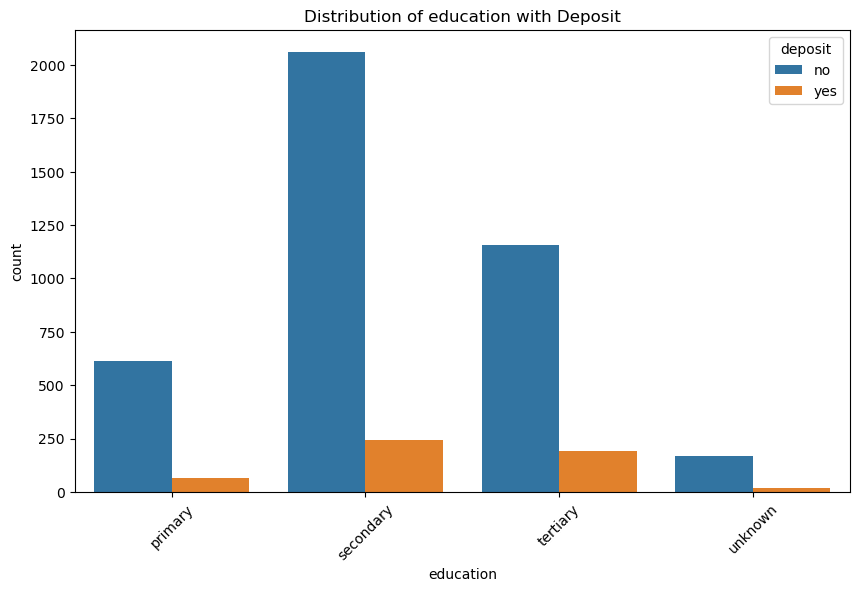

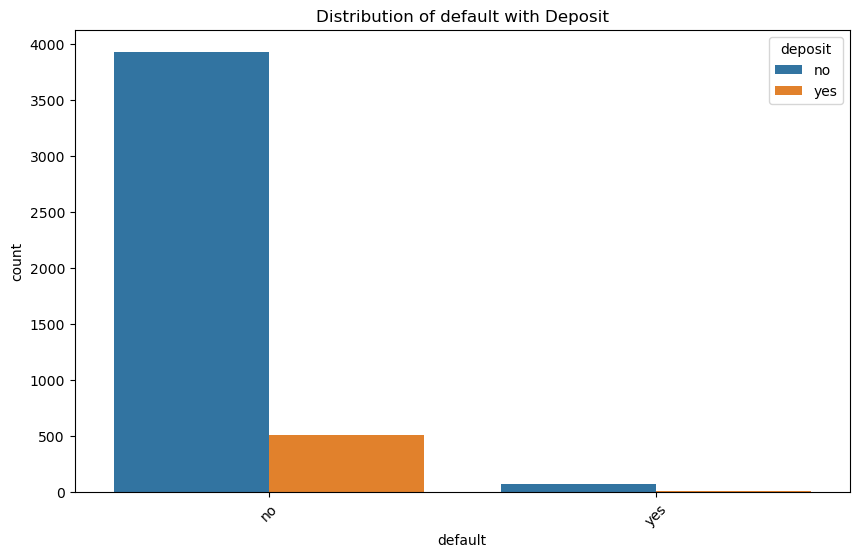

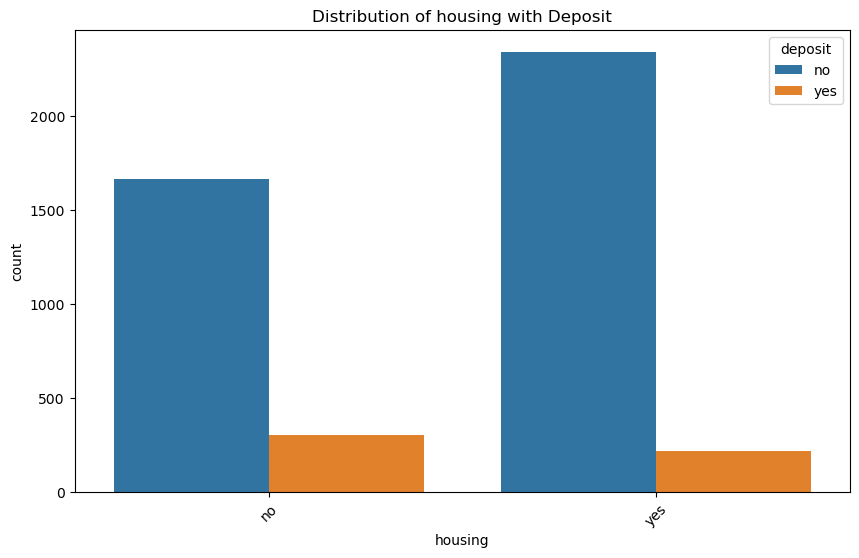

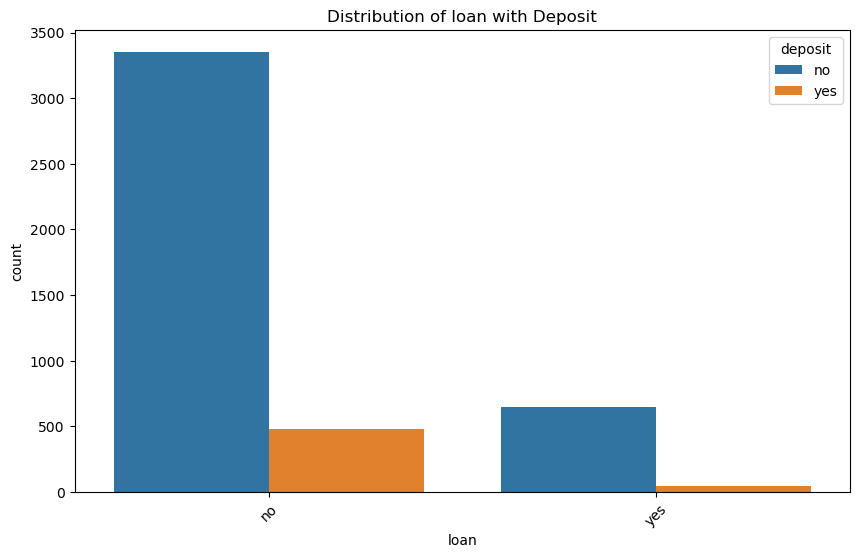

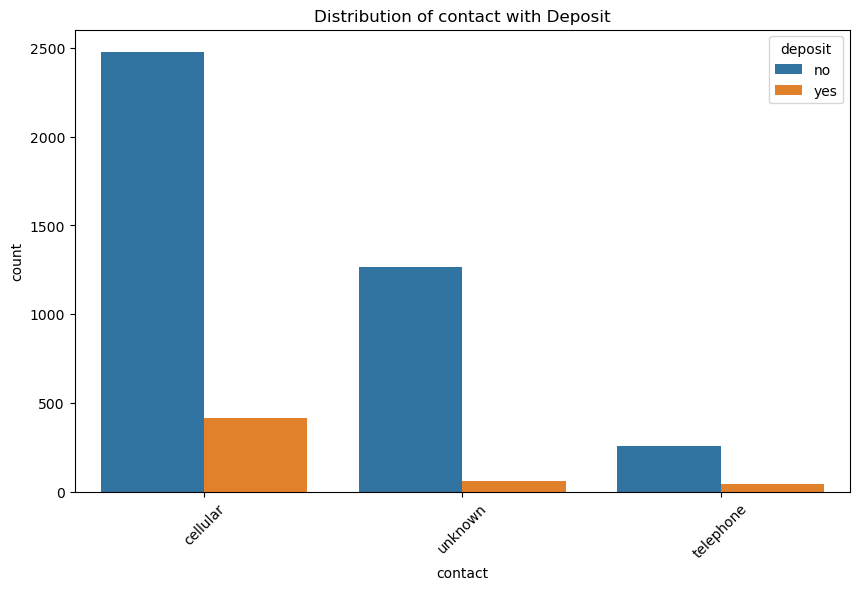

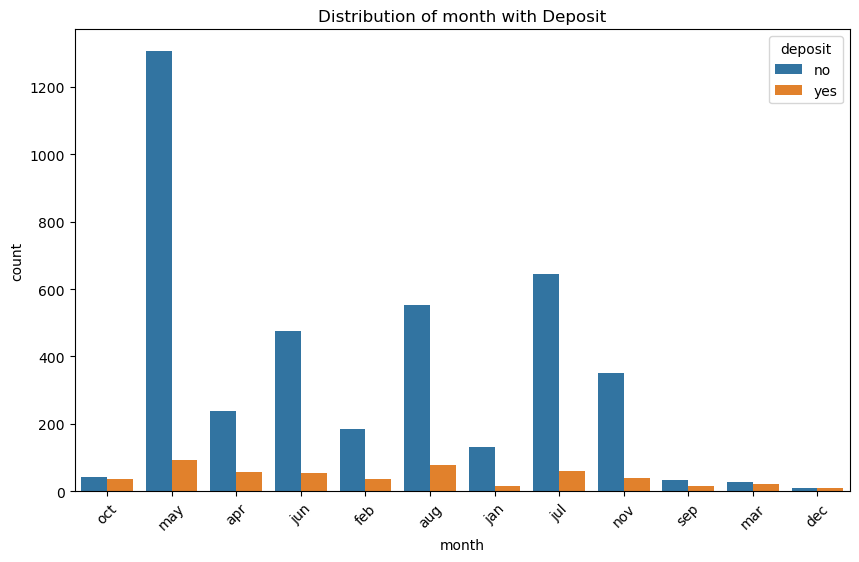

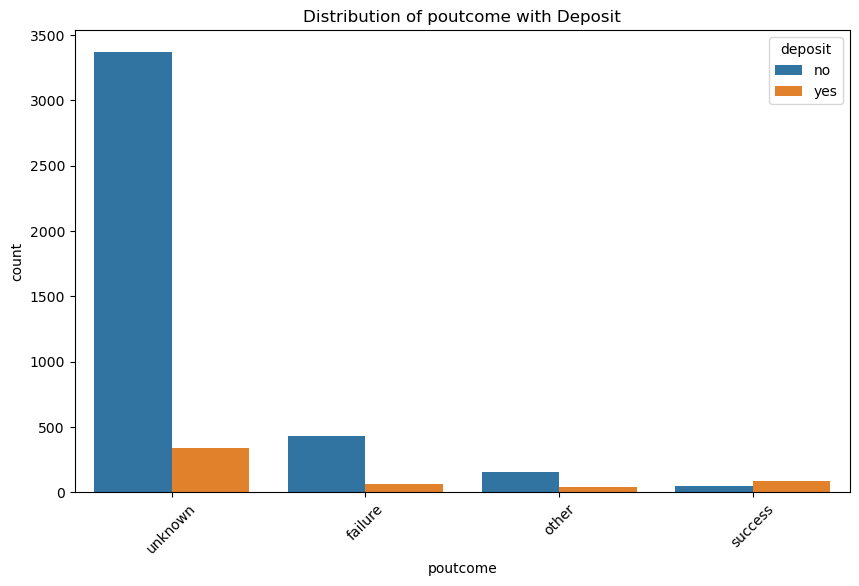

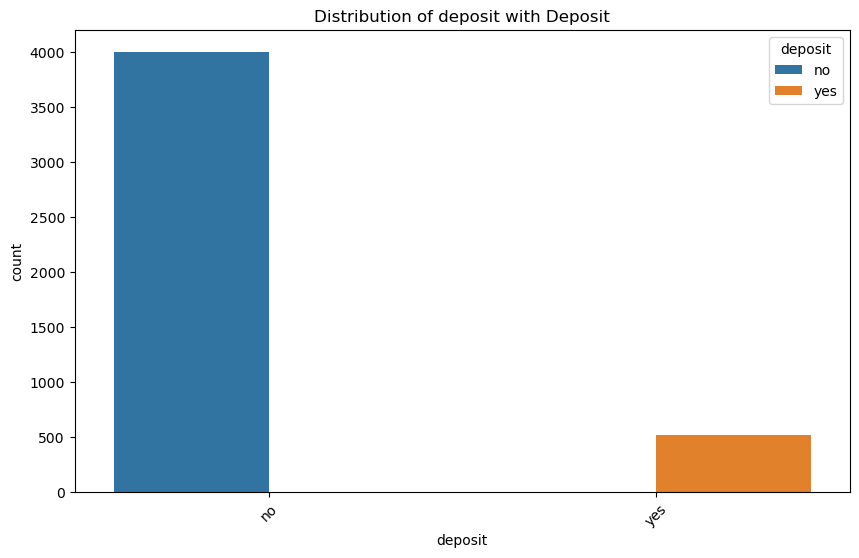

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame and 'cat_cols' is a list of categorical columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='deposit', data=data)
    plt.title(f'Distribution of {col} with Deposit')
    plt.xticks(rotation=45)
    plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# Define features and target variable
X = data.drop('deposit', axis=1)
y = data['deposit']

In [19]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [22]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Predictions
y_pred = clf.predict(X_test)
y_pred

array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no'

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8806629834254144

Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.93      0.93       807
         yes       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905


Confusion Matrix:
 [[748  59]
 [ 49  49]]


Based on the evaluation results of the decision tree classifier, here's a detailed analysis and summary:

1. **Accuracy**: The model achieved an accuracy of approximately 78.95%, indicating that it correctly predicted the purchasing decisions of customers nearly 79% of the time.

2. **Precision**: 
   - Precision for the "no" class (customers who did not make a purchase) is 79%, implying that out of all the instances predicted as "no", 79% were correctly classified.
   - Precision for the "yes" class (customers who made a purchase) is 78%, indicating that out of all the instances predicted as "yes", 78% were correctly classified.

3. **Recall**:
   - Recall for the "no" class is 80%, meaning that the model correctly identified 80% of all actual instances where customers did not make a purchase.
   - Recall for the "yes" class is 77%, indicating that the model captured 77% of all actual instances where customers made a purchase.

4. **F1-score**:
   - The F1-score, which is the harmonic mean of precision and recall, is around 80% for the "no" class and 78% for the "yes" class. This metric provides a balance between precision and recall.

5. **Confusion Matrix**:
   - The confusion matrix reveals that out of 2233 instances, the model correctly predicted 938 instances of "no" (true negatives) and 825 instances of "yes" (true positives). However, it misclassified 228 instances of "no" as "yes" (false positives) and 242 instances of "yes" as "no" (false negatives).

Overall, the decision tree classifier demonstrates reasonably good performance in predicting customer purchases based on demographic and behavioral data. However, there is room for improvement, particularly in reducing false positives and false negatives to enhance the precision and recall for both classes. Further refinement of the model through feature engineering, parameter tuning, or exploring alternative algorithms may help improve its predictive accuracy and reliability. Additionally, conducting deeper analysis into specific features that significantly influence purchasing decisions could provide valuable insights for targeted marketing strategies and customer engagement initiatives.